<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_3/chapter_5_demo_pretrain_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
#4/1AX4XfWhmCz0nJ7VyCZ92JvVWY6vHv91kdUM3nfrriWKurOw5LYe89aQSY5s

Mounted at /content/drive


In [5]:
import tensorflow
import numpy as np
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
from tensorflow.keras.models import load_model

##**Load the VGG model**

In [6]:
vgg_model = vgg16.VGG16(weights='imagenet')

553476096/553467096 [==============================] - 4s 0us/step


##**Load the InceptionV3 model**

In [7]:
inception_model = inception_v3.InceptionV3(weights='imagenet')

96124928/96112376 [==============================] - 1s 0us/step


##**Load the ResNet50 model**

In [8]:
resnet_model = resnet50.ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


##**Load the MobileNet model**

In [9]:
mobile_net = mobilenet.MobileNet(weights='imagenet')

17235968/17225924 [==============================] - 0s 0us/step


##**Save model to local**

In [10]:
#Create the HDF5 file
vgg_model.save('vgg_model.h5')
inception_model.save('inception_model.h5')
resnet_model.save('resnet_model.h5')
mobile_net.save('mobile_net.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


##**Load model to re-use**

In [11]:
# Vgg_model = load_model('vgg_model.h5')

##**Loading and preprocesing image**

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

In [33]:
url = '/content/drive/MyDrive/Parrot_Dataset/Cockatoo/download.jfif'
original = load_img(url, target_size=(224, 224))
original.size

(224, 224)

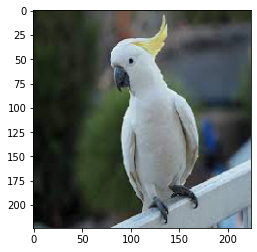

In [34]:
plt.imshow(original)

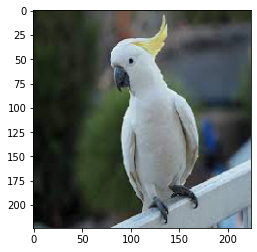

In [35]:
numpy_img = img_to_array(original)
plt.imshow(np.uint8(numpy_img))

In [36]:
img_batch = np.expand_dims(numpy_img, axis=0)

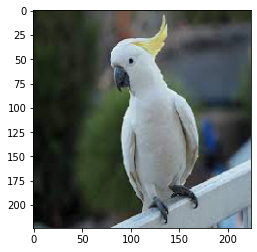

In [37]:
plt.imshow(np.uint8(img_batch[0]))

##**Predicting the Object Class**

In [38]:
processed_img = vgg16.preprocess_input(img_batch.copy()) #input 224 x 224 x 3
predictions = vgg_model.predict(processed_img)

In [39]:
label = decode_predictions(predictions)
label

[[('n01819313', 'sulphur-crested_cockatoo', 0.9999999),
  ('n01818515', 'macaw', 8.049309e-08),
  ('n01817953', 'African_grey', 2.4867484e-08),
  ('n01608432', 'kite', 2.3122523e-08),
  ('n01580077', 'jay', 1.7906723e-09)]]

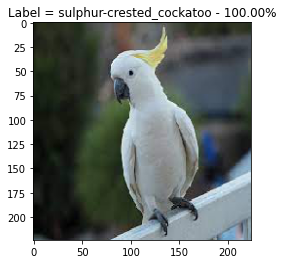

In [52]:
plt.imshow(original)
plt.title("Label = " + label[0][0][1] + " - " + str("{:.2f}".format(label[0][0][2] * 100)) + "%")
plt.show()

##**Sử dụng inceptionV3**

[[('n01819313', 'sulphur-crested_cockatoo', 0.9023183),
  ('n01817953', 'African_grey', 0.0028734894),
  ('n01818515', 'macaw', 0.0012150725),
  ('n01632777', 'axolotl', 0.0010000349),
  ('n01608432', 'kite', 0.00092404254)]]

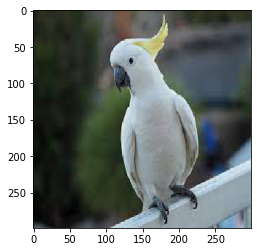

In [60]:
# prepare the image for the Intercept_V3 
# input: (299, 299, 3)
original2 = load_img(url, target_size=(299,299))
plt.imshow(original2)
numpy_image2 = img_to_array(original2)
image_batch2 = np.expand_dims(numpy_image2, axis=0)
processed_image_m2 = inception_v3.preprocess_input(image_batch2.copy())
predictions_inceptionv3 = inception_model.predict(processed_image_m2)
inception_label = decode_predictions(predictions_inceptionv3)
inception_label

##**Sử dụng resnet50**

In [55]:
processed_img_resnet = resnet50.preprocess_input(img_batch.copy())
predictions_resnet = resnet_model.predict(processed_img_resnet)
resnet_label = decode_predictions(predictions_resnet)
resnet_label

[[('n01819313', 'sulphur-crested_cockatoo', 0.9999566),
  ('n01818515', 'macaw', 1.5765263e-05),
  ('n01817953', 'African_grey', 1.4151608e-05),
  ('n01608432', 'kite', 4.5485826e-06),
  ('n01616318', 'vulture', 1.957172e-06)]]

##**Sử dụng mobilenet**

In [56]:
processed_img_mobilenet = mobilenet.preprocess_input(img_batch.copy())
predictions_mobilenet = mobile_net.predict(processed_img_mobilenet)
mobilenet_label = decode_predictions(predictions_mobilenet)
mobilenet_label

[[('n01819313', 'sulphur-crested_cockatoo', 0.9994879),
  ('n03888605', 'parallel_bars', 0.00020618133),
  ('n01608432', 'kite', 0.00012320635),
  ('n03535780', 'horizontal_bar', 6.912733e-05),
  ('n01796340', 'ptarmigan', 4.0091818e-05)]]